# Finding a Simple Neural Network

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt

We begin by retrieving the data and organizing it into a list of points defined by X1 values, X2 values, and the class in which they belong (in this case, the letters 'b', 'r', and 'g'.

In [2]:
# retrieve data as a list of each line
with open("train_set.txt", "r") as file:
    content = file.read()
    lines = content.splitlines()
# separate the data for each point
points = []
for point in lines:
    values = point.split(',')
    values[0] = float(values[0])
    values[1] = float(values[1])
    points.append(values)

Now we visualize the data, which we will reorganize to use the matplotlibpackage for visualization.

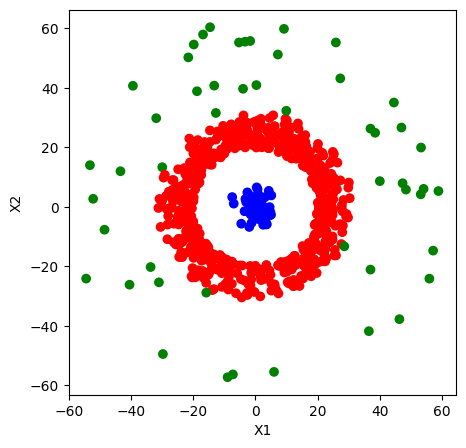

In [3]:
# reorganize the data for a plot
X1 = []
X2 = []
label = []

for p in points:
    X1.append(p[0])
    X2.append(p[1])
    label.append(p[2])

plt.figure(figsize=(5, 5))
plt.xlabel("X1")
plt.ylabel("X2")
fig = plt.scatter(X1,X2, color=label)
plt.show()

This visualization shows a simple pattern which we can probably classify by eye quite easily, but let's use a neural network to classify new points based on this data. We will use a Multi-Layer Perceptron (MLP) Classifier by scikit-learn, so let's import the package.

In [4]:
from sklearn.neural_network import MLPClassifier

We will once again reshape the data to fit the classifier requirements. Most default settings are used for the MLP classifier class. We will adjust activation types and hidden layer sizes to see the effect on performance. The parameter max_iter was increased from the default 200 to 400 to provide sufficient convergence time.

In [5]:
# make training data set as a list of points defined by X1 and X2 values
train = []
for i in range(len(points)):
    train.append([points[i][0], points[i][1]])

# create classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu',
                    hidden_layer_sizes=(5, 5), random_state=1, max_iter=400)
clf.fit(train, label)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), max_iter=400,
              random_state=1, solver='lbfgs')

Now let's use the classifier on every point in the domain of the original data set to predict the class of each point.

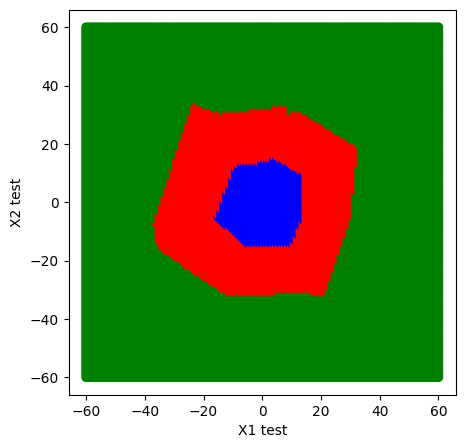

In [6]:
# find every point in the domain with integer values
X1_test = []
X2_test = []
for i in range(-60, 61):
    for j in range(-60, 61):
        X1_test.append(i)
        X2_test.append(j)

# format the test data for the classifier function input
test = []
for i in range(len(X1_test)):
    test.append([X1_test[i], X2_test[i]])

# predict labels using classifier
test_labels = clf.predict(test)

plt.figure(figsize=(5, 5))
plt.xlabel("X1 test")
plt.ylabel("X2 test")
fig = plt.scatter(X1_test, X2_test, color=test_labels)
plt.show()

This shows an accurate representation of the parameters of the original data set. This model was activated with rectified linear unit functions (ReLU). Now let's activate the model with the hyberbolic tangent function (tanh) and see if there is a difference in performance.

In [17]:
# create classifier with tanh activation function
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='tanh',
                    hidden_layer_sizes=(5, 5), random_state=1, max_iter=1700)
clf.fit(train, label)

MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(5, 5),
              max_iter=1700, random_state=1, solver='lbfgs')

The maximum number of iterations needs to be increased significantly when using this activation function. Let's visualize its accuracy.

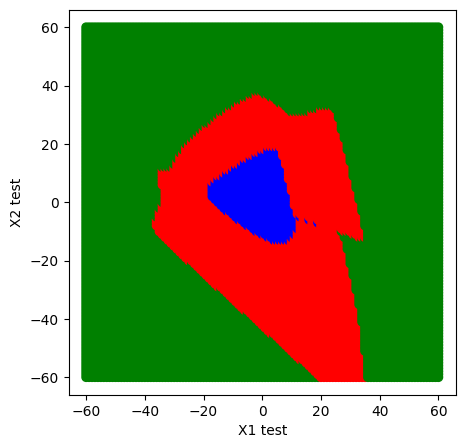

In [18]:
# predict labels using classifier
test_labels = clf.predict(test)

# plot results
plt.figure(figsize=(5, 5))
plt.xlabel("X1 test")
plt.ylabel("X2 test")
fig = plt.scatter(X1_test, X2_test, color=test_labels)
plt.show()

We can see that this model is less accurate and requires a higher number of iterations. Let's compare this to a logistic sigmoid activation function.

In [30]:
# create classifier with logistic sigmoid activation function
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='logistic',
                    hidden_layer_sizes=(5, 5), random_state=1, max_iter=2000)
clf.fit(train, label)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(5, 5),
              max_iter=2000, random_state=1, solver='lbfgs')

After 10,000 iterations, the solver does not converge. This will not be able to compete with the other models, so let's visualize its performance after 2,000 iterations.

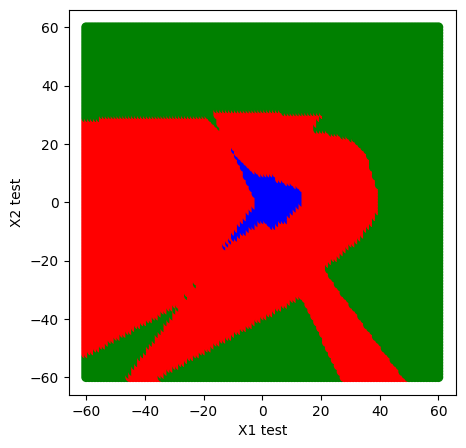

In [31]:
# predict labels using classifier
test_labels = clf.predict(test)

# plot results
plt.figure(figsize=(5, 5))
plt.xlabel("X1 test")
plt.ylabel("X2 test")
fig = plt.scatter(X1_test, X2_test, color=test_labels)
plt.show()

The performance with this activation function was much poorer. Let's see if we can improve the performance by changing the number of layers or changing the number of neurons in each layer. The parameter hidden_layer_sizes takes an array input, where size of the array is the number of hidden layers and the value of each element of the array is the number of neurons in that layer. We have been using 2 hidden layers, with 5 neurons in each layer. Let's first see what happens when we significantly increase the number of neurons.

In [39]:
neurons = [100, 100]
# create classifier with tanh activation function
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='logistic',
                    hidden_layer_sizes=neurons, random_state=1, max_iter=300)
clf.fit(train, label)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=[100, 100],
              max_iter=300, random_state=1, solver='lbfgs')

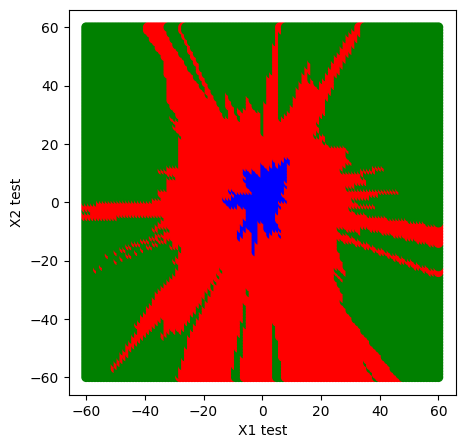

In [40]:
# predict labels using classifier
test_labels = clf.predict(test)

# plot results
plt.figure(figsize=(5, 5))
plt.xlabel("X1 test")
plt.ylabel("X2 test")
fig = plt.scatter(X1_test, X2_test, color=test_labels)
plt.show()

The solver now converges with significantly less iterations, and although the classification shape is quite inaccurate, it shows some improvement. Let's try adding another layer.

In [44]:
neurons = [100, 100, 100]
# create classifier with tanh activation function
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='logistic',
                    hidden_layer_sizes=neurons, random_state=1, max_iter=400)
clf.fit(train, label)

MLPClassifier(activation='logistic', alpha=1e-05,
              hidden_layer_sizes=[100, 100, 100], max_iter=400, random_state=1,
              solver='lbfgs')

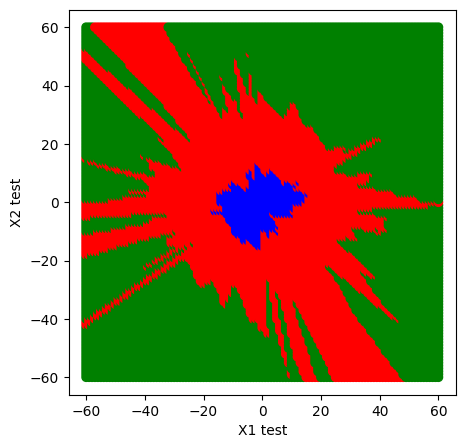

In [45]:
# predict labels using classifier
test_labels = clf.predict(test)

# plot results
plt.figure(figsize=(5, 5))
plt.xlabel("X1 test")
plt.ylabel("X2 test")
fig = plt.scatter(X1_test, X2_test, color=test_labels)
plt.show()

The runtime is starting to take a bit longer, as expected when adding layers to a neural network. The solver converged in less than 400 iterations, but the classifier did not improve in its performance. Let's see if we can improve the performance of a classifier using the tanh activation function by changing the parameters of the neural network.

In [46]:
neurons = [100, 100]
# create classifier with tanh activation function
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='tanh',
                    hidden_layer_sizes=neurons, random_state=1, max_iter=200)
clf.fit(train, label)

MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=[100, 100],
              random_state=1, solver='lbfgs')

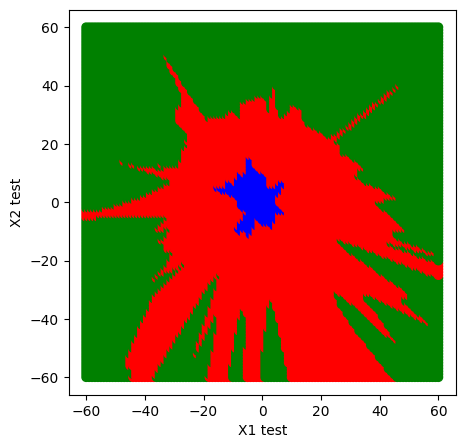

In [47]:
# predict labels using classifier
test_labels = clf.predict(test)

# plot results
plt.figure(figsize=(5, 5))
plt.xlabel("X1 test")
plt.ylabel("X2 test")
fig = plt.scatter(X1_test, X2_test, color=test_labels)
plt.show()

Increasing the number of neurons in each layer shows no improvement from the last classifier we used with the tanh activation function, but the solver does converge faster. Let's try changing the number of layers instead.

In [50]:
neurons = [5]*5
# create classifier with tanh activation function
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='tanh',
                    hidden_layer_sizes=neurons, random_state=1, max_iter=10000)
clf.fit(train, label)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh', alpha=1e-05,
              hidden_layer_sizes=[5, 5, 5, 5, 5], max_iter=10000,
              random_state=1, solver='lbfgs')

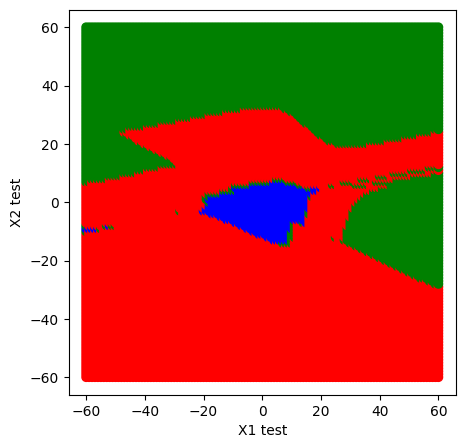

In [51]:
# predict labels using classifier
test_labels = clf.predict(test)

# plot results
plt.figure(figsize=(5, 5))
plt.xlabel("X1 test")
plt.ylabel("X2 test")
fig = plt.scatter(X1_test, X2_test, color=test_labels)
plt.show()

Adding more layers to the neural network makes the performance worse, so let's return to the most reliable activation function we've witnessed so far and see if we can improve its performance by changing the neural network parameters.

In [54]:
neurons = [5]*5
# create classifier with tanh activation function
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu',
                    hidden_layer_sizes=neurons, random_state=1, max_iter=400)
clf.fit(train, label)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=[5, 5, 5, 5, 5], max_iter=400,
              random_state=1, solver='lbfgs')

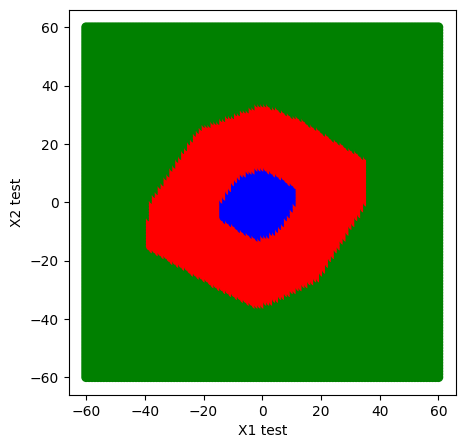

In [55]:
# predict labels using classifier
test_labels = clf.predict(test)

# plot results
plt.figure(figsize=(5, 5))
plt.xlabel("X1 test")
plt.ylabel("X2 test")
fig = plt.scatter(X1_test, X2_test, color=test_labels)
plt.show()

This shows the best performance so far. Let's see if we can achieve similar results with a less complex network. Let's start with changing the number of neurons in the layers.

In [56]:
neurons = [100, 100]
# create classifier with tanh activation function
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu',
                    hidden_layer_sizes=neurons, random_state=1, max_iter=400)
clf.fit(train, label)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=[100, 100], max_iter=400,
              random_state=1, solver='lbfgs')

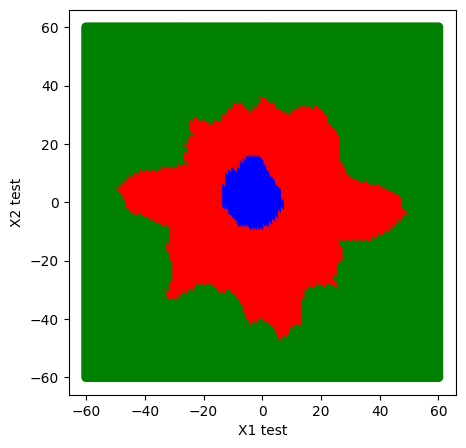

In [57]:
# predict labels using classifier
test_labels = clf.predict(test)

# plot results
plt.figure(figsize=(5, 5))
plt.xlabel("X1 test")
plt.ylabel("X2 test")
fig = plt.scatter(X1_test, X2_test, color=test_labels)
plt.show()

This classifier shows less accurate results. Additionally, the solver does not converge any faster. So it seems that our first choice of using a rectified linear unit function as an activation function with a neural network consisting of layers with few neurons was the best choice. Now let's find an optimal combination meeting those requirements.

In [58]:
# create classifier with tanh activation function
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu',
                    hidden_layer_sizes=(5, 2), random_state=1, max_iter=400)
clf.fit(train, label)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=400,
              random_state=1, solver='lbfgs')

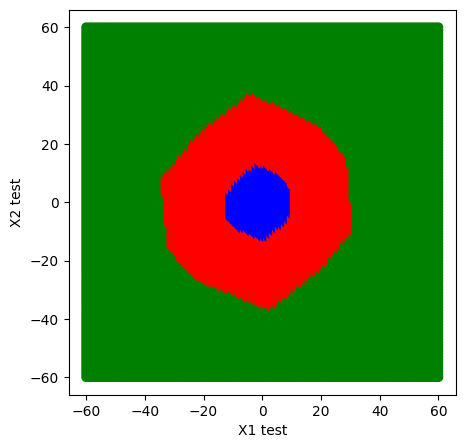

In [59]:
# predict labels using classifier
test_labels = clf.predict(test)

# plot results
plt.figure(figsize=(5, 5))
plt.xlabel("X1 test")
plt.ylabel("X2 test")
fig = plt.scatter(X1_test, X2_test, color=test_labels)
plt.show()

Let's use that same neural network and evaluate its performance when different attributes of the data are used to train the classifier. The attributes given by the data set are X1 and X2. Let's create three new classifiers, X3, X4 and X5.

In [60]:
# X3 = X1^2
X3 = []
# X4 = X2^2
X4 = []
# X5 = product of X1 and X2
X5 = []
for i in range(len(X1)):
    X3.append(X1[i]**2)
    X4.append(X2[i]**2)
    X5.append(X1[i] * X2[i])

Let's start by using X3 and X4 to train the classifier.

In [100]:
# make training data set as a list of points defined by X1 and X2 values
train = []
for i in range(len(X3)):
    train.append([X3[i], X4[i]])

# create classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu',
                    hidden_layer_sizes=(6, 3), random_state=1, max_iter=200)
# use new attributes with associated labels to train the classifier
clf.fit(train, label)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 3), random_state=1,
              solver='lbfgs')

To make predictions with this classifier, we need to find the attributes X3 and X4 for the test data to pass them to the classifier.

In [101]:
# find attributes X3 and X4 for the test data
test_attributes = []
for i in range(len(test)):
    test_attributes.append([test[i][0]**2, test[i][1]**2])

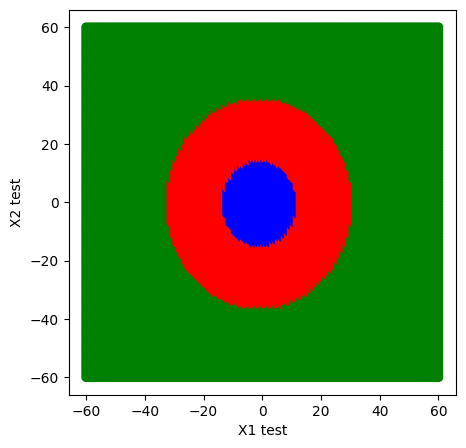

In [102]:
# predict labels using classifier
test_labels = clf.predict(test_attributes)

# plot results
plt.figure(figsize=(5, 5))
plt.xlabel("X1 test")
plt.ylabel("X2 test")
# keep same test plot points with new prediction labels
fig = plt.scatter(X1_test, X2_test, color=test_labels)
plt.show()

The neural network structure needed to be modified to show accurate results, which turn out to be very clean results. It is worth noting that under these conditions, the solver now converges with the default number of iterations, so this is the best performing classifier so far. Now let's train the classifier with X3 and X5.

In [149]:
# make training data set as a list of points defined by X1 and X2 values
train = []
for i in range(len(X3)):
    train.append([X3[i], X5[i]])

# create classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu',
                    hidden_layer_sizes=(6, 3), random_state=1, max_iter=4000)
# use new attributes with associated labels to train the classifier
clf.fit(train, label)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 3), max_iter=4000,
              random_state=1, solver='lbfgs')

In [150]:
# find attributes X3 and X5 for the test data
test_attributes = []
for i in range(len(test)):
    test_attributes.append([test[i][0], test[i][0] * test[i][1]])

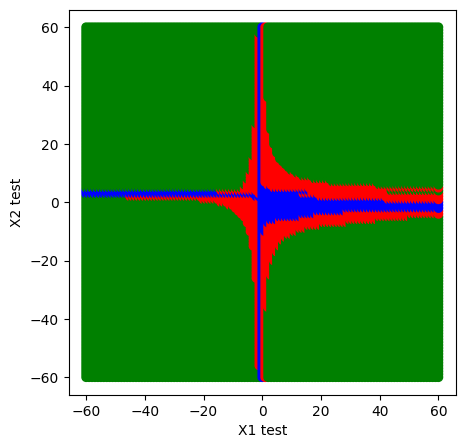

In [151]:
# predict labels using classifier
test_labels = clf.predict(test_attributes)

# plot results
plt.figure(figsize=(5, 5))
plt.xlabel("X1 test")
plt.ylabel("X2 test")
# keep same test plot points with new prediction labels
fig = plt.scatter(X1_test, X2_test, color=test_labels)
plt.show()

This shows a significant degradation in accuracy, even after retraining the neural network with different numbers of neurons in the hidden layers. Perhaps X5 is not the best attribute to use. Let's try using X3, X4, and X5 together.

In [212]:
# make training data set as a list of points defined by X1 and X2 values
train = []
for i in range(len(X3)):
    train.append([X3[i], X4[i], X5[i]])

# create classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu',
                    hidden_layer_sizes=(3, 2), random_state=1, max_iter=200)
# use new attributes with associated labels to train the classifier
clf.fit(train, label)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 2), random_state=1,
              solver='lbfgs')

In [202]:
# find attributes X3, X4, and X5 for the test data
test_attributes = []
for i in range(len(test)):
    test_attributes.append([test[i][0]**2, test[i][1]**2, test[i][0] * test[i][1]])

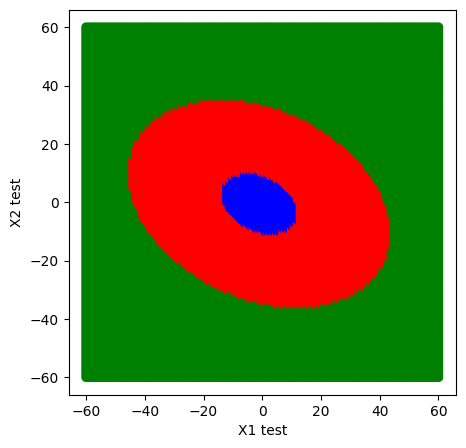

In [213]:
# predict labels using classifier
test_labels = clf.predict(test_attributes)

# plot results
plt.figure(figsize=(5, 5))
plt.xlabel("X1 test")
plt.ylabel("X2 test")
# keep same test plot points with new prediction labels
fig = plt.scatter(X1_test, X2_test, color=test_labels)
plt.show()

Like the last model, the number of neurons in each layer needed to be adjusted to find more accurate results. This model shows improved performance than previous models, but at the cost of accuracy (note the oblong shape). Now we try a classifier with all 5 attributes.

In [247]:
# make training data set as a list of points defined by X1 and X2 values
train = []
for i in range(len(X1)):
    train.append([X1[i], X2[i], X3[i], X4[i], X5[i]])

# create classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu',
                    hidden_layer_sizes=(6, 3), random_state=1, max_iter=200)
# use new attributes with associated labels to train the classifier
clf.fit(train, label)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 3), random_state=1,
              solver='lbfgs')

In [214]:
# find all 5 attributes for the test data
test_attributes = []
for i in range(len(test)):
    test_attributes.append([test[i][0], test[i][1], test[i][0]**2, test[i][1]**2, test[i][0]*test[i][1]])

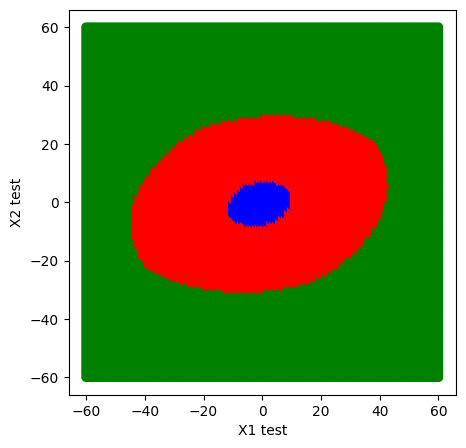

In [248]:
# predict labels using classifier
test_labels = clf.predict(test_attributes)

# plot results
plt.figure(figsize=(5, 5))
plt.xlabel("X1 test")
plt.ylabel("X2 test")
# keep same test plot points with new prediction labels
fig = plt.scatter(X1_test, X2_test, color=test_labels)
plt.show()

The accuracy of this model is similar to the last model, which also used more than two features. It seems that we see the best performance with X3 and X4 only, which means that introducing X5 makes the model less accurate.

After exploring different approaches to creating a neural network classifier, we have found an accurate and sufficiently non-complex model by feeding it attributes of polar coordinates (X3 and X4) derived from the original data set. The simplest neural network we found that delivers accurate results consists of two hidden layers with 6 neurons in the first layer and 3 neurons in the second. The neural network utilizes the rectified linear unit activation function and iterates less than 200 times.